# Gill Model

GILL, A. (1980). Some simple solutions for heat-induced tropical circulation. Quarterly Journal of the Royal Meteorological Society, 106(449):447–462.

This code calculates the analytic solution of the canonical Gill model
and plots the results. 
The code is not wll documented internally. However, it is straightforward
to read, in connjuction with a description of the Gill solution, such as
may be found in Chapter 8 of AOFD.

Code by G. K. Vallis
Transliated into python by J. -E. Lee

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


Set the resolution.

In [2]:
imax=200                # # of points in the x axis
jmax=200                # # of points in the y axis

xmax = 15               # longitude max
ymax = 5                # latitude max
xmin=-10                # longitude min
ymin=-5                 # latitude min

#imaxd2 = imax/2;
#jmaxd2 = jmax/2;
alpha = 0.1;
beta = 1;
L = 2;
k = np.pi/(2*L);
alk = 1./(alpha**2 + k**2);
alk3 = 1./(9*alpha**2 + k**2);


Set the x and y 

In [3]:
x = (xmax-xmin)*np.arange(imax)/(imax-1) + xmin;
y = (ymax-ymin)*np.arange(jmax)/(jmax-1) + ymin;
expy=np.exp(-y**2/4.)

xx,yy=np.meshgrid(x,y)

zer=np.zeros((jmax))
y1=y
zer[:]=0.
xe=xmax; yn=ymax;

Now start the calculation.
Evaluate forcing

In [4]:
indx1=np.where(abs(x) <L)
indx2=np.where(x>L)
indx3=np.where(x<-L)

FQ=np.zeros((imax))
FQ[indx1] = np.cos(k*x[indx1])


Now evaluate q0, heating source symmetric about the equator

In [5]:
q0=np.zeros((imax))

q0[indx2]=-alk*k*(1+np.exp(-2*alpha*L))*np.exp(alpha*(L-x[indx2]))
q0[indx1] = -alk*(alpha*np.cos(k*x[indx1]) + k*(np.sin(k*x[indx1]) + np.exp(-alpha*(x[indx1]+L))));

Now use q0 to evaluate the Kelvin wave solution

In [6]:
uk=np.zeros((jmax,imax))
pk=np.zeros((jmax,imax))
vk=np.zeros((jmax,imax))
wk=np.zeros((jmax,imax))

for j in range(jmax):
    for i in range(imax):

        uk[j,i] = 0.5*q0[i]*expy[j]
        pk[j,i] = uk[j,i]
        vk[j,i] = 0
        wk[j,i] = 0.5*(alpha*q0[i] + FQ[i])*expy[j]

#plt.contourf(wk)

In [7]:
# Now evaluate q2, which we will use for the Rossby solution. q2*y is the unsymmetrical heat source.
q2=np.zeros((imax))

q2[indx3] = -alk3*k*(1.+np.exp(-6.*alpha*L))*np.exp(3.*alpha*(x[indx3]+L));  
q2[indx1] = alk3*(-3.*alpha*np.cos(k*x[indx1]) + k*(np.sin(k*x[indx1]) - np.exp(3.*alpha*(x[indx1]-L))));

#plt.plot(x,q0)
#plt.plot(x,q2)

In [8]:
# Now use the q2 to reconstruct the Rossby wave solution
ur=np.zeros((jmax,imax))
pr=np.zeros((jmax,imax))
vr=np.zeros((jmax,imax))
wr=np.zeros((jmax,imax))
for j in range(jmax):
    for i in range(imax):
        pr[j,i] = 0.5*q2[i]*(1+y[j]**2)*expy[j];
        ur[j,i] = 0.5*q2[i]*(y[j]**2 -3)*expy[j];
        vr[j,i] = (FQ[i] + 4*alpha*q2[i])*y[j]*expy[j];
        wr[j,i] = 0.5*(FQ[i]+alpha*q2[i]*(1+y[j]**2))*expy[j];
        
#plt.contourf(wr)
#plt.show()

In [9]:
# Now construct the Total solution

ukr = uk + ur
pkr = pk + pr
vkr = vk + vr
wkr = wk + wr

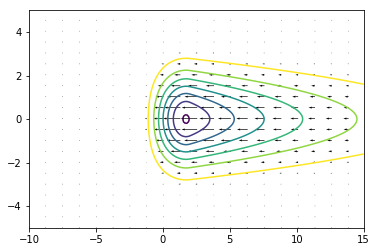

In [10]:
#Kelvin solution
plt.contour(xx,yy,pk)
q=plt.quiver(xx[0::10,0::10],yy[0::10,0::10],uk[0::10,0::10],vk[0::10,0::10],width=0.002,
               scale=1 / 0.05)
plt.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='1 m/s', labelpos='E')

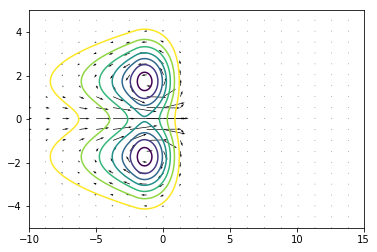

In [11]:
#Rossby solution
plt.contour(xx,yy,pr)
q=plt.quiver(xx[0::10,0::10],yy[0::10,0::10],ur[0::10,0::10],vr[0::10,0::10],width=0.002,
               scale=1 / 0.05)
plt.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='1 m/s', labelpos='E')

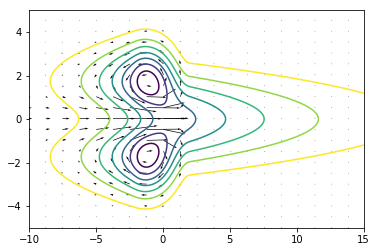

In [12]:
#Total solution
plt.contour(xx,yy,pkr)
q=plt.quiver(xx[0::10,0::10],yy[0::10,0::10],ur[0::10,0::10],vr[0::10,0::10],width=0.002,
               scale=1 / 0.05)
plt.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='1 m/s', labelpos='E')

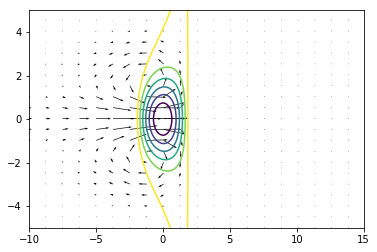

In [13]:
#Total vertical velocity
#print (wkr)
plt.contour(xx,yy,-wkr)
q=plt.quiver(xx[0::10,0::10],yy[0::10,0::10],ur[0::10,0::10],vr[0::10,0::10],width=0.002,
               scale=1 / 0.05)
plt.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='1 m/s', labelpos='E')

In [14]:
# Now plot the overturning streamfunctions
# In fact I don't use this code. 

mmax=20;
mmaxd2 = mmax/2;
zmax = 1;
zmin=0.0
psiz=np.zeros((mmax,imax))
xx2=np.zeros((mmax,imax))
zz2=np.zeros((mmax,imax))
z = (zmax-zmin)*np.arange(mmax)/(mmax-1) + zmin
print (z.shape)

for i in range (imax):
    for m in range (mmax):
        ssn = np.sin(np.pi*z[m]/zmax);
        psiz[m,i] = (1/np.sqrt(np.pi))*(q0[i] - q2[i])*ssn;
        
        
xx2,zz2 = np.meshgrid(x,z)

(20,)


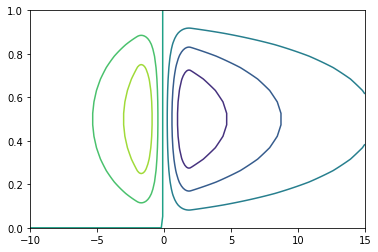

In [68]:
psim=np.zeros((mmax,jmax))

for j in range(jmax):
    for m in range(mmax):
        ssn = np.sin(np.pi*z[m]/zmax);
        psim[m,j] = (-y[j]/3.)*np.exp(-y[j]**2/4)*ssn;

yy2,zz2 = np.meshgrid(y,z)
plt.contour(xx2,zz2,psiz);

Now do the analytic solution for a line source
 
 fac3 = 3/(2*factorial(3)); fac4 = 5/(4*factorial(4)); fac5 = 3*7/(4*factorial(5)); 
 for i = 1:imax
 for j = 1:jmax
     x = xx(i,j); y = yy(i,j); 
     % First calculate the cylinder functions
     yc = y;
     poly = (1 - yc + 0.25*yc^2 - fac3*yc^3 + fac4*yc^4 - fac5*yc^5);
     expy = exp(-yc^2/4);
     dpoly = (-1 + 0.5*yc - 3*fac3*yc^2 + 4*fac4*yc^3 - 5*fac5*yc^4);
     dexpy = -0.5*yc*expy;
     exx(i,j) = expy;
     polyy(i,j) = poly;
     U(i,j)  =  expy*poly;
     Ud(i,j) =  expy*dpoly + dexpy*poly; 
     yc = -y;
     poly = (1 - yc + 0.25*yc^2 - fac3*yc^3 + fac4*yc^4 - fac5*yc^5);
     expy = exp(-yc^2/4);
     dpoly = (-1 + 0.5*yc - 3*fac3*yc^2 + 4*fac4*yc^3 - 5*fac5*yc^4);
     dexpy = -0.5*yc*expy;
     Um(i,j)  =  expy*poly;
     Umd(i,j) =  expy*dpoly + dexpy*poly; 
     yc = 1;
     poly = (1 - yc + 0.25*yc^2 - fac3*yc^3 + fac4*yc^4 - fac5*yc^5);
     expy = exp(-yc^2/4);
     dpoly = (-1 + 0.5*yc - 3*fac3*yc^2 + 4*fac4*yc^3 - 5*fac5*yc^4);
     dexpy = -0.5*yc*expy;
     U1 =  expy*poly;
     U1d =  expy*dpoly + dexpy*poly; 
     yc = -1;
     poly = (1 - yc + 0.25*yc^2 - fac3*yc^3 + fac4*yc^4 - fac5*yc^5);
     expy = exp(-yc^2/4);
     dpoly = (-1 + 0.5*yc - 3*fac3*yc^2 + 4*fac4*yc^3 - 5*fac5*yc^4);
     dexpy = -0.5*yc*expy;
     Um1 =  expy*poly;
     Um1d =  expy*dpoly + dexpy*poly; 
     yc = 0;
     poly = (1 - yc + 0.25*yc^2 - fac3*yc^3 + fac4*yc^4 - fac5*yc^5);
     expy = exp(-yc^2/4);
     dpoly = (-1 + 0.5*yc - 3*fac3*yc^2 + 4*fac4*yc^3 - 5*fac5*yc^4);
     dexpy = -0.5*yc*expy;
     U0 =  expy*poly;
     U0d =  expy*dpoly + dexpy*poly; 
     
     % Now solutions for y0 = 1;
     if y > 1
         v1(i,j) = alpha*U(i,j)/U1d;
         u1(i,j) = (y/2.)*U(i,j)/U1d;
         p1(i,j) = -Ud(i,j)/U1d;
     elseif y <= 1
         v1(i,j) = -alpha*Um(i,j)/Um1d;
         u1(i,j) = -(y/2.)*Um(i,j)/Um1d;
         p1(i,j) = -Umd(i,j)/Um1d;
     end
          % Now solutions for y0 =0;
     if y > 0
         v0(i,j) = alpha*U(i,j)/U0d;
         u0(i,j) = (y/2.)*U(i,j)/U0d;
         p0(i,j) = -Ud(i,j)/U0d;
     elseif y <= 0
         v0(i,j) = -alpha*Um(i,j)/U0d;
         u0(i,j) = -(y/2.)*Um(i,j)/U0d;
         p0(i,j) = -Umd(i,j)/U0d;
     end
     %
 end
 end
plt.contour(xx,yy,p1)
q=plt.quiver(xx[0::10,0::10],yy[0::10,0::10],ur[0::10,0::10],vr[0::10,0::10],width=0.002,
               scale=1 / 0.05)
plt.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='1 m/s', labelpos='E')